In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
!pwd


/Users/kc/Documents/GitHub/academic-projects/python_proj/15_movie_recommendation


## 📽️ Step1: Clean Data

In [3]:
# read movies dataset
# replace the path with local path
pd_movies = pd.read_csv('/Users/kc/Documents/GitHub/academic-projects/python_proj/15_movie_recommendation/csv/5000_credits/tmdb_5000_movies.csv')
pd_movies.shape


(4803, 20)

In [ ]:
# display the first 10 rows of movies file
pd_movies.head(10)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avenge

In [ ]:
# display column's labels
pd_movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [ ]:
# read credits dataset
pd_credits = pd.read_csv('/Users/kc/Desktop/cs5002discretemath/finalProject/CS5002_Final_Project_[KaijunChen_XueyuanDeng]/csv/5000_credits/tmdb_5000_credits.csv')
pd_credits.shape


(4803, 4)

In [ ]:
# display the first 10 rows of credits file
pd_credits.head(10)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
5,559,Spider-Man 3,"[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de..."
6,38757,Tangled,"[{""cast_id"": 34, ""character"": ""Flynn Rider (vo...","[{""credit_id"": ""52fe46db9251416c91062101"", ""de..."
7,99861,Avengers: Age of Ultron,"[{""cast_id"": 76, ""character"": ""Tony Stark / Ir...","[{""credit_id"": ""55d5f7d4c3a3683e7e0016eb"", ""de..."
8,767,Harry Potter and the Half-Blood Prince,"[{""cast_id"": 3, ""character"": ""Harry Potter"", ""...","[{""credit_id"": ""52fe4273c3a36847f801fab1"", ""de..."
9,209112,Batman v Superman: Dawn of Justice,"[{""cast_id"": 18, ""character"": ""Bruce Wayne / B...","[{""credit_id"": ""553bf23692514135c8002886"", ""de..."


In [ ]:
# display column's labels
pd_credits.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [ ]:
# rename id in movies file to keep the same with credits file
pd_movies.rename(columns={"id": "movie_id"}, inplace=True)
pd_movies.head()


,budget,genres,homepage,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
# merge two dataframe on movie_id
merged_df = pd_movies.merge(pd_credits, on='movie_id', how='right')
merged_df.head()

,budget,genres,homepage,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
# ignore the columns named title_x and title_y
merged_df.columns

Index(['budget', 'genres', 'homepage', 'movie_id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline',
       'title_x', 'vote_average', 'vote_count', 'title_y', 'cast', 'crew'],
      dtype='object')

In [ ]:
# remove the columns that we do not need, 
# and keep the following columns to analyze in the content based program
new_merged_df = merged_df[['movie_id', 'original_title', 'genres', 'keywords',
                           'overview', 'production_companies','release_date', 
                           'runtime', 'cast']]
new_merged_df.head()


,movie_id,original_title,genres,keywords,overview,production_companies,release_date,runtime,cast
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,162.0,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""..."
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,169.0,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa..."
2,206647,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,148.0,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr..."
3,49026,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,165.0,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba..."
4,49529,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,132.0,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c..."


In [ ]:
# split year, month, and day to keep year,and then put into new_merged_df
released_date = new_merged_df["release_date"].str.split("-",expand = True)
released_date.head()

,0,1,2
0,2009,12,10
1,2007,05,19
2,2015,10,26
3,2012,07,16
4,2012,03,07


In [ ]:
# merge the year column into new_merged_df
new_merged_df['release_year'] = released_date[0]
new_merged_df.head()

/var/folders/xv/vgfm40_j7gv8s17ygh1t5tlr0000gn/T/ipykernel_43062/3245048301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_merged_df['release_year'] = released_date[0]


,movie_id,original_title,genres,keywords,overview,production_companies,release_date,runtime,cast,release_year
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,162.0,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...",2009
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,169.0,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...",2007
2,206647,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,148.0,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...",2015
3,49026,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,165.0,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...",2012
4,49529,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,132.0,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...",2012


In [ ]:
# to see the row 1 with the context in the column of genre
# 'name' is what we need
new_merged_df.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [ ]:
# to see the context in the column of keywords
# 'name' is what we need
new_merged_df.iloc[0].keywords

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [ ]:
# to see the context in the column of overview
new_merged_df.iloc[0].overview

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [ ]:
# to see the context in the column of production_companies
# 'name' is what we need
new_merged_df.iloc[0].production_companies

'[{"name": "Ingenious Film Partners", "id": 289}, {"name": "Twentieth Century Fox Film Corporation", "id": 306}, {"name": "Dune Entertainment", "id": 444}, {"name": "Lightstorm Entertainment", "id": 574}]'

In [ ]:
# to see the context in the column of cast
# 'name' is what we need
new_merged_df.iloc[0].cast

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [ ]:
# from the above analysis, we know that 'name' can be a key word to format content
# convert string to list or dict
def convert_str_to_list(string):
    '''Convert column to list format'''
    res = []
    for item in ast.literal_eval(string):
        # each item is a dictionary
        res.append(item['name'])
    return res

def convert_and_pick(string):
    '''Convert cast column to list and pick the first 5 main characters'''
    res, cnt = [], 0
    for item in ast.literal_eval(string):
        if cnt < 5:
            res.append(item['name'])
            cnt += 1
    return res

def split_string(string):
    '''Split overview column'''
    if string != "":
        return str(string).split()
    
def remove_space(ls):
    '''Remove the space of elements in list'''
    res = []
    for item in ls:
        res.append(item.replace(" ", ""))
    return res

In [ ]:
# apply convert_str_to_list func to the column of genres
new_merged_df['genres'] = new_merged_df['genres'].apply(convert_str_to_list)
new_merged_df.head()

/var/folders/xv/vgfm40_j7gv8s17ygh1t5tlr0000gn/T/ipykernel_43062/1501472296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_merged_df['genres'] = new_merged_df['genres'].apply(convert_str_to_list)


,movie_id,original_title,genres,keywords,overview,production_companies,release_date,runtime,cast,release_year
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,162.0,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...",2009
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,169.0,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...",2007
2,206647,Spectre,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,148.0,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...",2015
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,165.0,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...",2012
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,132.0,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...",2012


In [ ]:
# apply convert_str_to_list func to the column of keywords
new_merged_df['keywords'] = new_merged_df['keywords'].apply(convert_str_to_list)
new_merged_df.head()

/var/folders/xv/vgfm40_j7gv8s17ygh1t5tlr0000gn/T/ipykernel_43062/2413557375.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_merged_df['keywords'] = new_merged_df['keywords'].apply(convert_str_to_list)


,movie_id,original_title,genres,keywords,overview,production_companies,release_date,runtime,cast,release_year
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,162.0,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...",2009
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,169.0,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...",2007
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,148.0,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...",2015
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,165.0,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...",2012
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,132.0,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...",2012


In [ ]:
# apply convert_str_to_list func to the column of cast
new_merged_df['cast'] = new_merged_df['cast'].apply(convert_and_pick)
new_merged_df.head()

/var/folders/xv/vgfm40_j7gv8s17ygh1t5tlr0000gn/T/ipykernel_43062/2933563547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_merged_df['cast'] = new_merged_df['cast'].apply(convert_and_pick)


,movie_id,original_title,genres,keywords,overview,production_companies,release_date,runtime,cast,release_year
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,162.0,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",2009
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,169.0,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",2007
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,148.0,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",2015
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,165.0,"[Christian Bale, Michael Caine, Gary Oldman, A...",2012
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,132.0,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",2012


In [ ]:
# apply convert_str_to_list func to the column of production_companies
new_merged_df['production_companies'] = new_merged_df['production_companies'].apply(convert_str_to_list)
new_merged_df.head()

/var/folders/xv/vgfm40_j7gv8s17ygh1t5tlr0000gn/T/ipykernel_43062/1360124350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_merged_df['production_companies'] = new_merged_df['production_companies'].apply(convert_str_to_list)


,movie_id,original_title,genres,keywords,overview,production_companies,release_date,runtime,cast,release_year
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...","[Ingenious Film Partners, Twentieth Century Fo...",2009-12-10,162.0,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",2009
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...","[Walt Disney Pictures, Jerry Bruckheimer Films...",2007-05-19,169.0,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",2007
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,"[Columbia Pictures, Danjaq, B24]",2015-10-26,148.0,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",2015
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,"[Legendary Pictures, Warner Bros., DC Entertai...",2012-07-16,165.0,"[Christian Bale, Michael Caine, Gary Oldman, A...",2012
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...",[Walt Disney Pictures],2012-03-07,132.0,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",2012


In [ ]:
# To see if func works for pick the first 5 main characters
new_merged_df.iloc[0].cast

['Sam Worthington',
 'Zoe Saldana',
 'Sigourney Weaver',
 'Stephen Lang',
 'Michelle Rodriguez']

In [ ]:
# apply split_string func to the column of overview
new_merged_df['overview'] = new_merged_df['overview'].apply(split_string)
new_merged_df.head()

/var/folders/xv/vgfm40_j7gv8s17ygh1t5tlr0000gn/T/ipykernel_43062/288057309.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_merged_df['overview'] = new_merged_df['overview'].apply(split_string)


,movie_id,original_title,genres,keywords,overview,production_companies,release_date,runtime,cast,release_year
0,19995,Avatar,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[In, the, 22nd, century,, a, paraplegic, Marin...","[Ingenious Film Partners, Twentieth Century Fo...",2009-12-10,162.0,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",2009
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Captain, Barbossa,, long, believed, to, be, d...","[Walt Disney Pictures, Jerry Bruckheimer Films...",2007-05-19,169.0,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",2007
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[A, cryptic, message, from, Bond’s, past, send...","[Columbia Pictures, Danjaq, B24]",2015-10-26,148.0,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",2015
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Following, the, death, of, District, Attorney...","[Legendary Pictures, Warner Bros., DC Entertai...",2012-07-16,165.0,"[Christian Bale, Michael Caine, Gary Oldman, A...",2012
4,49529,John Carter,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[John, Carter, is, a, war-weary,, former, mili...",[Walt Disney Pictures],2012-03-07,132.0,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",2012


In [ ]:
# remove space for the columns of genres, keywords, overview, production_companies, cast
label_list = ['genres', 'keywords', 'overview', 'production_companies', 'cast']
for label in label_list:
    new_merged_df[label] = new_merged_df[label].apply(remove_space)
# display df
new_merged_df.head()

/var/folders/xv/vgfm40_j7gv8s17ygh1t5tlr0000gn/T/ipykernel_43062/1546419530.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_merged_df[label] = new_merged_df[label].apply(remove_space)


,movie_id,original_title,genres,keywords,overview,production_companies,release_date,runtime,cast,release_year
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[In, the, 22nd, century,, a, paraplegic, Marin...","[IngeniousFilmPartners, TwentiethCenturyFoxFil...",2009-12-10,162.0,"[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",2009
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[Captain, Barbossa,, long, believed, to, be, d...","[WaltDisneyPictures, JerryBruckheimerFilms, Se...",2007-05-19,169.0,"[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",2007
2,206647,Spectre,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[A, cryptic, message, from, Bond’s, past, send...","[ColumbiaPictures, Danjaq, B24]",2015-10-26,148.0,"[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",2015
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[Following, the, death, of, District, Attorney...","[LegendaryPictures, WarnerBros., DCEntertainme...",2012-07-16,165.0,"[ChristianBale, MichaelCaine, GaryOldman, Anne...",2012
4,49529,John Carter,"[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[John, Carter, is, a, war-weary,, former, mili...",[WaltDisneyPictures],2012-03-07,132.0,"[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",2012


In [ ]:
saved_df = new_merged_df[['movie_id', 'original_title', 'release_year', 'genres',
                          'keywords', 'overview', 'production_companies', 'runtime',
                         'cast']]
saved_df.head()


,movie_id,original_title,release_year,genres,keywords,overview,production_companies,runtime,cast
0,19995,Avatar,2009,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[In, the, 22nd, century,, a, paraplegic, Marin...","[IngeniousFilmPartners, TwentiethCenturyFoxFil...",162.0,"[SamWorthington, ZoeSaldana, SigourneyWeaver, ..."
1,285,Pirates of the Caribbean: At World's End,2007,"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[Captain, Barbossa,, long, believed, to, be, d...","[WaltDisneyPictures, JerryBruckheimerFilms, Se...",169.0,"[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste..."
2,206647,Spectre,2015,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[A, cryptic, message, from, Bond’s, past, send...","[ColumbiaPictures, Danjaq, B24]",148.0,"[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp..."
3,49026,The Dark Knight Rises,2012,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[Following, the, death, of, District, Attorney...","[LegendaryPictures, WarnerBros., DCEntertainme...",165.0,"[ChristianBale, MichaelCaine, GaryOldman, Anne..."
4,49529,John Carter,2012,"[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[John, Carter, is, a, war-weary,, former, mili...",[WaltDisneyPictures],132.0,"[TaylorKitsch, LynnCollins, SamanthaMorton, Wi..."


In [ ]:
# save it as a new csv file named merged.csv 
saved_df.to_csv('merged.csv', index=False)


In [ ]:
# read the data
m_df = pd.read_csv('/Users/kc/Desktop/cs5002discretemath/finalProject/merged.csv')
m_df.head()


,movie_id,original_title,release_year,genres,keywords,overview,production_companies,runtime,cast
0,19995,Avatar,2009.0,"['Action', 'Adventure', 'Fantasy', 'ScienceFic...","['cultureclash', 'future', 'spacewar', 'spacec...","['In', 'the', '22nd', 'century,', 'a', 'parapl...","['IngeniousFilmPartners', 'TwentiethCenturyFox...",162.0,"['SamWorthington', 'ZoeSaldana', 'SigourneyWea..."
1,285,Pirates of the Caribbean: At World's End,2007.0,"['Adventure', 'Fantasy', 'Action']","['ocean', 'drugabuse', 'exoticisland', 'eastin...","['Captain', 'Barbossa,', 'long', 'believed', '...","['WaltDisneyPictures', 'JerryBruckheimerFilms'...",169.0,"['JohnnyDepp', 'OrlandoBloom', 'KeiraKnightley..."
2,206647,Spectre,2015.0,"['Action', 'Adventure', 'Crime']","['spy', 'basedonnovel', 'secretagent', 'sequel...","['A', 'cryptic', 'message', 'from', 'Bond’s', ...","['ColumbiaPictures', 'Danjaq', 'B24']",148.0,"['DanielCraig', 'ChristophWaltz', 'LéaSeydoux'..."
3,49026,The Dark Knight Rises,2012.0,"['Action', 'Crime', 'Drama', 'Thriller']","['dccomics', 'crimefighter', 'terrorist', 'sec...","['Following', 'the', 'death', 'of', 'District'...","['LegendaryPictures', 'WarnerBros.', 'DCEntert...",165.0,"['ChristianBale', 'MichaelCaine', 'GaryOldman'..."
4,49529,John Carter,2012.0,"['Action', 'Adventure', 'ScienceFiction']","['basedonnovel', 'mars', 'medallion', 'spacetr...","['John', 'Carter', 'is', 'a', 'war-weary,', 'f...",['WaltDisneyPictures'],132.0,"['TaylorKitsch', 'LynnCollins', 'SamanthaMorto..."


In [ ]:
def collect(label):
    '''Collect unique label in label column'''
    res = dict()
    for item in m_df[label]:
        for elm in ast.literal_eval(item):
            if elm not in res: res[elm] = 1
            else: res[elm] += 1
    return res


In [ ]:
# display genres
collect('genres')


{'Action': 1154,
 'Adventure': 790,
 'Fantasy': 424,
 'ScienceFiction': 535,
 'Crime': 696,
 'Drama': 2297,
 'Thriller': 1274,
 'Animation': 234,
 'Family': 513,
 'Western': 82,
 'Comedy': 1722,
 'Romance': 894,
 'Horror': 519,
 'Mystery': 348,
 'History': 197,
 'War': 144,
 'Music': 185,
 'Documentary': 110,
 'Foreign': 34,
 'TVMovie': 8}

In [ ]:
# sort the dictionary with values of each genre
sorted_genres = dict(sorted(collect('genres').items(), key= lambda item: item[1], reverse=True))
sorted_genres


{'Drama': 2297,
 'Comedy': 1722,
 'Thriller': 1274,
 'Action': 1154,
 'Romance': 894,
 'Adventure': 790,
 'Crime': 696,
 'ScienceFiction': 535,
 'Horror': 519,
 'Family': 513,
 'Fantasy': 424,
 'Mystery': 348,
 'Animation': 234,
 'History': 197,
 'Music': 185,
 'War': 144,
 'Documentary': 110,
 'Western': 82,
 'Foreign': 34,
 'TVMovie': 8}

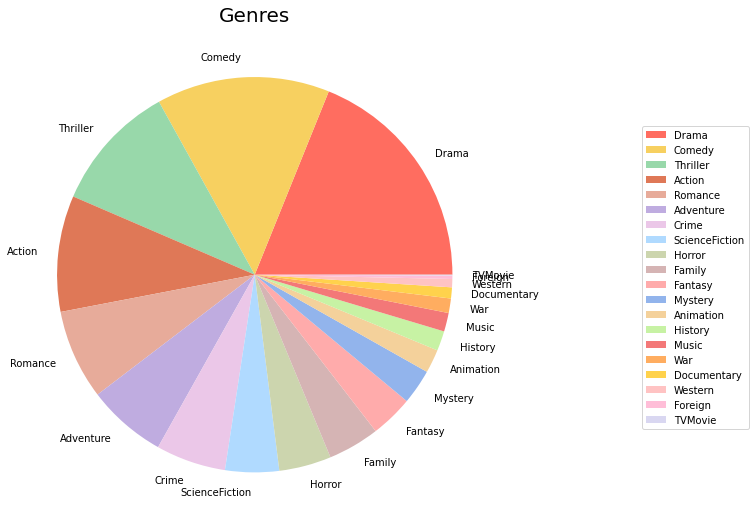

In [ ]:
# generate a pie chart for genres in our dataset
labels_genre = sorted_genres.keys()
count_genre = sorted_genres.values()
colors = ['#FF6D60', '#F7D060', '#98D8AA', '#DF7857', '#E7AB9A',
         '#BFACE0', '#EBC7E8', '#B0DAFF', '#CCD5AE', '#D5B4B4',
         '#FFABAB', '#92B4EC', '#F4D19B', '#C7F2A4', '#F37878',
         '#FFAD60', '#FFD24C', '#FFC3C3', '#FFBED8', '#D9D7F1']
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(211)
ax.set_title('Genres', fontsize = 20, loc='center')
pie = ax.pie(count_genre, startangle=0, colors = colors, labels=labels_genre)
plt.legend(bbox_to_anchor=(1.5, 0.8), loc='best', borderaxespad=0) 
plt.show()


In [ ]:
# concatenate contents of five columns into labels
# by using saved_df file
saved_df['labels']= saved_df['genres']+saved_df['keywords']+saved_df['production_companies']+saved_df['cast']+saved_df['overview']
saved_df.head()

,movie_id,original_title,release_year,genres,keywords,overview,production_companies,runtime,cast,labels
0,19995,Avatar,2009,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[In, the, 22nd, century,, a, paraplegic, Marin...","[IngeniousFilmPartners, TwentiethCenturyFoxFil...",162.0,"[SamWorthington, ZoeSaldana, SigourneyWeaver, ...","[Action, Adventure, Fantasy, ScienceFiction, c..."
1,285,Pirates of the Caribbean: At World's End,2007,"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[Captain, Barbossa,, long, believed, to, be, d...","[WaltDisneyPictures, JerryBruckheimerFilms, Se...",169.0,"[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...","[Adventure, Fantasy, Action, ocean, drugabuse,..."
2,206647,Spectre,2015,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[A, cryptic, message, from, Bond’s, past, send...","[ColumbiaPictures, Danjaq, B24]",148.0,"[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...","[Action, Adventure, Crime, spy, basedonnovel, ..."
3,49026,The Dark Knight Rises,2012,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[Following, the, death, of, District, Attorney...","[LegendaryPictures, WarnerBros., DCEntertainme...",165.0,"[ChristianBale, MichaelCaine, GaryOldman, Anne...","[Action, Crime, Drama, Thriller, dccomics, cri..."
4,49529,John Carter,2012,"[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[John, Carter, is, a, war-weary,, former, mili...",[WaltDisneyPictures],132.0,"[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...","[Action, Adventure, ScienceFiction, basedonnov..."


In [ ]:
saved_df['labels'] = saved_df['labels'].apply(lambda x:" ".join(x))
saved_df['labels'][0]

'Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d IngeniousFilmPartners TwentiethCenturyFoxFilmCorporation DuneEntertainment LightstormEntertainment SamWorthington ZoeSaldana SigourneyWeaver StephenLang MichelleRodriguez In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [ ]:
# Next step, we are going to calculate the frequency of words in labels
from sklearn.feature_extraction.text import CountVectorizer
countvectorizer = CountVectorizer()
count_matrix = countvectorizer.fit_transform(saved_df['labels'])
count_matrix

<4803x42299 sparse matrix of type '<class 'numpy.int64'>'
	with 281069 stored elements in Compressed Sparse Row format>

In [ ]:
count_2D_array = count_matrix.toarray()
count_2D_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# Find something interesting that '卧底肥妈','绝地奶霸','超级妈妈', these Chinese words 
# all refers to a same move called 'Big Momma's House', which is a comedy and action movie released in 2000.
labels_df = pd.DataFrame(data=count_2D_array, columns = countvectorizer.get_feature_names())
labels_df

,00,000,007,07am,10,100,1000,100bares,101,1019entertainment,...,única,über,đỗthịhảiyến,špelacolja,γη,юлияснигирь,پیمانمعادی,卧底肥妈,绝地奶霸,超级妈妈
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4799,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4801,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# This list includes the most frequently occurring words 
# which were converted into vectors
countvectorizer.get_feature_names()


['00',
 '000',
 '007',
 '07am',
 '10',
 '100',
 '1000',
 '100bares',
 '101',
 '1019entertainment',
 '101ststreetfilms',
 '108',
 '10th',
 '10thholeproductions',
 '10weststudios',
 '11',
 '114',
 '117',
 '118',
 '119',
 '11th',
 '12',
 '1200',
 '120dbfilms',
 '120films',
 '1215',
 '1250',
 '125th',
 '12th',
 '13',
 '1300',
 '13ghostsproductionscanadainc',
 '13th',
 '14',
 '140',
 '1408',
 '142',
 '1429',
 '148',
 '1492pictures',
 '14pm',
 '14th',
 '15',
 '150',
 '150th',
 '1520s',
 '1536',
 '15th',
 '15thcentury',
 '16',
 '1600s',
 '161',
 '1630s',
 '1644',
 '1681',
 '1691',
 '16blockproductions',
 '16th',
 '16thcentury',
 '17',
 '170',
 '1700s',
 '173rd',
 '1748',
 '1776',
 '17th',
 '17thcentury',
 '18',
 '180',
 '1800',
 '1812productions',
 '1818',
 '1820',
 '1820s',
 '1821pictures',
 '1824',
 '1831',
 '1834',
 '1836',
 '1838',
 '1839',
 '1841',
 '1845',
 '1850',
 '1850s',
 '1856',
 '1857',
 '1860',
 '1862',
 '1863',
 '1870s',
 '1875',
 '1876',
 '1879',
 '1880s',
 '1882',
 '1885',
 '1

In [ ]:
# Another important step is to deal with the similar words,
# for example, running, run and ran should be regarded as the same vector.
# Using a tool from NLP library
# stemming is to extract the main part of a word that does not change when endings are added to it.
# For example, run is the stemming for running, runs, and run.
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
# try stem
porter_stemmer.stem('running')

'run'

In [ ]:
# Apply this method to saved_df, and then repeat the above steps to compress words
def stemming(string):
    '''To stem word from input'''
    res = []
    for char in string.split():
        res.append(porter_stemmer.stem(char))
    return " ".join(res)
saved_df['labels'] = saved_df['labels'].apply(stemming)
saved_df

,movie_id,original_title,release_year,genres,keywords,overview,production_companies,runtime,cast,labels
0,19995,Avatar,2009,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[In, the, 22nd, century,, a, paraplegic, Marin...","[IngeniousFilmPartners, TwentiethCenturyFoxFil...",162.0,"[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",action adventur fantasi sciencefict culturecla...
1,285,Pirates of the Caribbean: At World's End,2007,"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[Captain, Barbossa,, long, believed, to, be, d...","[WaltDisneyPictures, JerryBruckheimerFilms, Se...",169.0,"[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",adventur fantasi action ocean drugabus exotici...
2,206647,Spectre,2015,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[A, cryptic, message, from, Bond’s, past, send...","[ColumbiaPictures, Danjaq, B24]",148.0,"[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",action adventur crime spi basedonnovel secreta...
3,49026,The Dark Knight Rises,2012,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[Following, the, death, of, District, Attorney...","[LegendaryPictures, WarnerBros., DCEntertainme...",165.0,"[ChristianBale, MichaelCaine, GaryOldman, Anne...",action crime drama thriller dccomic crimefight...
4,49529,John Carter,2012,"[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[John, Carter, is, a, war-weary,, former, mili...",[WaltDisneyPictures],132.0,"[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",action adventur sciencefict basedonnovel mar m...
...,...,...,...,...,...,...,...,...,...,...
4798,9367,El Mariachi,1992,"[Action, Crime, Thriller]","[unitedstates–mexicobarrier, legs, arms, paper...","[El, Mariachi, just, wants, to, play, his, gui...",[ColumbiaPictures],81.0,"[CarlosGallardo, JaimedeHoyos, PeterMarquardt,...",action crime thriller unitedstates–mexicobarri...
4799,72766,Newlyweds,2011,"[Comedy, Romance]",[],"[A, newlywed, couple's, honeymoon, is, upended...",[],85.0,"[EdwardBurns, KerryBishé, MarshaDietlein, Cait...",comedi romanc edwardburn kerrybishé marshadiet...
4800,231617,"Signed, Sealed, Delivered",2013,"[Comedy, Drama, Romance, TVMovie]","[date, loveatfirstsight, narration, investigat...","[""Signed,, Sealed,, Delivered"", introduces, a,...","[FrontStreetPictures, MuseEntertainmentEnterpr...",120.0,"[EricMabius, KristinBooth, CrystalLowe, GeoffG...",comedi drama romanc tvmovi date loveatfirstsig...
4801,126186,Shanghai Calling,2012,[],[],"[When, ambitious, New, York, attorney, Sam, is...",[],98.0,"[DanielHenney, ElizaCoupe, BillPaxton, AlanRuc...",danielhenney elizacoup billpaxton alanruck zhu...


In [ ]:
# follow steps above
new_2D_array = countvectorizer.fit_transform(saved_df['labels']).toarray()
new_2D_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
labels_df2 = pd.DataFrame(data=new_2D_array, columns = countvectorizer.get_feature_names())
labels_df2

,00,000,007,07am,10,100,1000,100bare,101,1019entertain,...,única,über,đỗthịhảiyến,špelacolja,γη,юлияснигирь,پیمانمعادی,卧底肥妈,绝地奶霸,超级妈妈
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4799,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4801,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 📽️ Step 2: Analysis & Program

We will utilize the cosine similarity to compute a numerical value that indicates the similarity between 
two movies. The reason we opt for the cosine similarity score is that it can be calculated quickly and with ease. Also, it remains unaffected by magnitude.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# calculate the similarity with cosine_similarity
similarity_movie = cosine_similarity(new_2D_array)
similarity_movie

array([[1.        , 0.21320072, 0.19264016, ..., 0.21346772, 0.14193844,
        0.11549858],
       [0.21320072, 1.        , 0.26411826, ..., 0.23028804, 0.25419556,
        0.15650161],
       [0.19264016, 0.26411826, 1.        , ..., 0.26096943, 0.189298  ,
        0.1757153 ],
       ...,
       [0.21346772, 0.23028804, 0.26096943, ..., 1.        , 0.29087303,
        0.18080493],
       [0.14193844, 0.25419556, 0.189298  , ..., 0.29087303, 1.        ,
        0.24044075],
       [0.11549858, 0.15650161, 0.1757153 , ..., 0.18080493, 0.24044075,
        1.        ]])

In [ ]:
# Now we have similarities of movies with all other. 
# The first item in 2d array is similarity of first movie with others.
# So we can try to write a program to recommand movies for users.
# Let's try search Titanic's index
saved_df[saved_df['original_title'] == 'Titanic'].index[0]

25

In [ ]:
# make a robot for recommendation
def recommendation_robot(movie_title):
    '''To return the first 10 movies that are most relative'''
    try:
        index = saved_df[saved_df['original_title'] == movie_title].index[0]
        difference = similarity_movie[index]
        diff_tuple = enumerate(difference)
        res = sorted(list(diff_tuple), key=lambda x:x[1], reverse=True)[1:11]
        print('Movie recommendations:')
        for item in res:
            print(saved_df.iloc[item[0]].original_title)
    except:
        print(f'Sorry, I cannot find {movie_title}. Please update my version to Otto2')


## 📽️ Step 3: Introduce Otto
## 🤖 Hey, I'm Otto, a recommendation robot ! What can I do for you?
### Tell me a movie you like, and I will recommand 10 movies right for you.

In [ ]:
# Forrest Gump, Titanic, Avatar, A man called Otto
user_input = input('movie title: ')

In [ ]:
recommendation_robot(user_input)

Movie recommendations:
Urbania
Me You and Five Bucks
Homefront
Julija in Alfa Romeo
The Other Side of Heaven
The R.M.
Roadside Romeo
Last Orders
Hugo
1982
